# Model Testing for Daily Fantasy Scores
Predict for the minimum and maximum winning scores for a slate

In [1]:
import logging

FORMAT = '%(asctime)-15s :: %(message)s'
logging.basicConfig(format=FORMAT)
LOGGER = logging.getLogger('dfscore')
LOGGER.setLevel(logging.INFO)
LOGGER.info("logger ready")

2021-09-14 19:42:20,287 :: logger ready


In [2]:
from generate_train_test import generate_train_test, load_csv
from automl import create_automl_model, error_report


def evaluate_models(sport, service, style, contest_type, framework, automl_params,
                    pca_components=5, seed=0): 
    """
    evaluate and return 6 models, for the top score and last winning score evaluate 
    1) a standard model using all features, 
    2) a pca model that reduces the features to pca_components components
    3) a model based on best score
    """
    models = {}
    df = load_csv(sport, service, style, contest_type)
    # with pd.option_context('max_rows', 1000, 'max_columns', 100):
    #     LOGGER.info(f"{len(df)} rows")
    # display(df)        

    # generate 6 models, top and last winning score models 
    # using 1) all data columns, 2) pca reduction of all data and 3) just the best possible score
    for model_cols in [None, {'best-possible-score'}]:
        model_data = generate_train_test(
            df,
            model_cols=model_cols,
            random_state=seed,
        )
        
        if model_data is None or len(model_data[0]) < 5:
            LOGGER.error("Not enough training data available!")
            return
            
        (X_train, X_test, y_top_train, y_top_test,
         y_last_win_train, y_last_win_test) = model_data
        
        model_ys = [
            ('top-score', y_top_train, y_top_test), 
            ('last-win-score', y_last_win_train, y_last_win_test), 
        ]
        # models for top and last winning score
        for model_name, y_train, y_test in model_ys:
            LOGGER.info(f"training {model_name=} {model_cols=}")
            model, fit_params = create_automl_model(
                model_name, 
                seed=seed,
                framework=framework,
                **automl_params
            )
            model.fit(X_train, y_train, **fit_params)
            model_desc = f"{sport}-{service}-{style.name}-{contest_type.NAME}-{model_name}-{framework}: {model_cols=}"
            error_report(model, X_test, y_test, model_desc)
            models[model_desc] = model
            
        # pca models only when using multiple data columns
        if model_cols is not None and len(model_cols) == 1:
            return
                
        for model_name, y_train, y_test in model_ys:
            model_name += '-pca'
            LOGGER.info(f"training {model_name=} {model_cols=}")
            model, fit_params = create_automl_model(
                model_name,
                pca_components=pca_components,
                seed=RANDOM_SEED,
                framework=framework,
                **automl_params
            )
            model.fit(X_train, y_train, **fit_params)
            model_desc = f"{sport}-{service}-{style.name}-{contest_type.NAME}-{model_name}-{framework}: {model_cols=}"
            error_report(model, X_test, y_test, model_desc)
            models[model_desc] = model
            
    return models

/home/delano/working/fantasy/venv-3.9/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


2021-09-14 19:42:24-INFO-dfscore(29)-starting
loading filename='nhl-yahoo-CLASSIC-FIFTY_FIFTY.csv'
204 rows of data loaded
dropping 328 rows due to nan_slate_rows=164 nan_best_score_rows=164
2021-09-14 19:42:24-INFO-dfscore(41)-training model_name='top-score' model_cols=None


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -191.02886670351512

Generation 2 - Current best internal CV score: -191.02886670351512

Generation 3 - Current best internal CV score: -190.51316950672475

Generation 4 - Current best internal CV score: -190.51316950672475

Generation 5 - Current best internal CV score: -190.51316950672475

Generation 6 - Current best internal CV score: -182.66967361111205

Generation 7 - Current best internal CV score: -180.00972555555614

Generation 8 - Current best internal CV score: -175.69958277777826

Generation 9 - Current best internal CV score: -175.69958277777826

Generation 10 - Current best internal CV score: -169.43967882613308

Generation 11 - Current best internal CV score: -162.23018154595277

Generation 12 - Current best internal CV score: -162.23018154595277

Generation 13 - Current best internal CV score: -161.84213383154946

Generation 14 - Current best internal CV score: -161.84213383154946

Generation 15 - Current best internal CV s

/home/delano/working/fantasy/venv-3.9/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


R2 score: -0.2588
RMSE score: 22.2482
MAE score: 4.1797
2021-09-14 20:53:46-INFO-dfscore(41)-training model_name='last-win-score' model_cols=None


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -222.3474535649037

Generation 2 - Current best internal CV score: -217.8650339190648

Generation 3 - Current best internal CV score: -167.865282141465

Generation 4 - Current best internal CV score: -167.865282141465

Generation 5 - Current best internal CV score: -167.865282141465

Generation 6 - Current best internal CV score: -167.865282141465

Generation 7 - Current best internal CV score: -167.865282141465

Generation 8 - Current best internal CV score: -167.865282141465

Generation 9 - Current best internal CV score: -167.865282141465

Generation 10 - Current best internal CV score: -167.865282141465

Generation 11 - Current best internal CV score: -158.73274880693893

Generation 12 - Current best internal CV score: -158.73274880693893

Generation 13 - Current best internal CV score: -146.30653989647237

Generation 14 - Current best internal CV score: -146.30653989647237

Generation 15 - Current best internal CV score: -146.3065398

/home/delano/working/fantasy/venv-3.9/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


R2 score: -0.8264
RMSE score: 17.4161
MAE score: 3.6617
2021-09-14 21:21:44-INFO-dfscore(59)-training model_name='top-score-pca' model_cols=None


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -174.97854081513734

Generation 2 - Current best internal CV score: -174.97854081513734

Generation 3 - Current best internal CV score: -174.97854081513734

Generation 4 - Current best internal CV score: -174.97854081513734

Generation 5 - Current best internal CV score: -174.97854081513734

Generation 6 - Current best internal CV score: -141.71652232919013

Generation 7 - Current best internal CV score: -141.71652232919013

Generation 8 - Current best internal CV score: -141.71652232919013

Generation 9 - Current best internal CV score: -141.71652232919013

Generation 10 - Current best internal CV score: -141.71652232919013

Generation 11 - Current best internal CV score: -141.71652232919013

Generation 12 - Current best internal CV score: -141.71652232919013

Generation 13 - Current best internal CV score: -126.8676602163875

Generation 14 - Current best internal CV score: -126.8676602163875

Generation 15 - Current best internal CV sco

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -178.28254973899257

Generation 2 - Current best internal CV score: -167.21962003386406

Generation 3 - Current best internal CV score: -160.67259722222207

Generation 4 - Current best internal CV score: -158.04313236381358

Generation 5 - Current best internal CV score: -158.04313236381358

Generation 6 - Current best internal CV score: -158.04313236381358

Generation 7 - Current best internal CV score: -158.04313236381358

Generation 8 - Current best internal CV score: -157.47068402777762

Generation 9 - Current best internal CV score: -149.06051775989977

Generation 10 - Current best internal CV score: -137.14113635380266

Generation 11 - Current best internal CV score: -135.2522202999998

Generation 12 - Current best internal CV score: -128.14043599550706

Generation 13 - Current best internal CV score: -106.61373112939171

Generation 14 - Current best internal CV score: -106.61373112939171

Generation 15 - Current best internal CV sc

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -196.74967086110388

Generation 2 - Current best internal CV score: -190.52658011634367

Generation 3 - Current best internal CV score: -190.52658011634367

Generation 4 - Current best internal CV score: -190.52658011634367

Generation 5 - Current best internal CV score: -187.49622102640555

Generation 6 - Current best internal CV score: -187.49622102640555

Generation 7 - Current best internal CV score: -187.49622102640555

Generation 8 - Current best internal CV score: -187.49622102640555

Generation 9 - Current best internal CV score: -187.49622102640555

Generation 10 - Current best internal CV score: -184.29028994038603

Generation 11 - Current best internal CV score: -160.87480116313193

Generation 12 - Current best internal CV score: -160.87480116313193

Generation 13 - Current best internal CV score: -160.87480116313193

Generation 14 - Current best internal CV score: -160.07059192164115

Generation 15 - Current best internal CV s

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -183.39388722222193

Generation 2 - Current best internal CV score: -183.39388722222193

Generation 3 - Current best internal CV score: -183.39388722222193

Generation 4 - Current best internal CV score: -183.39388722222193

Generation 5 - Current best internal CV score: -183.39388722222193

Generation 6 - Current best internal CV score: -164.31273611111084

Generation 7 - Current best internal CV score: -164.31273611111084

Generation 8 - Current best internal CV score: -164.31273611111084

Generation 9 - Current best internal CV score: -164.31273611111084

Generation 10 - Current best internal CV score: -164.31273611111084

Generation 11 - Current best internal CV score: -164.31273611111084

Generation 12 - Current best internal CV score: -164.31273611111084

Generation 13 - Current best internal CV score: -164.31273611111084

Generation 14 - Current best internal CV score: -164.31273611111084

Generation 15 - Current best internal CV s

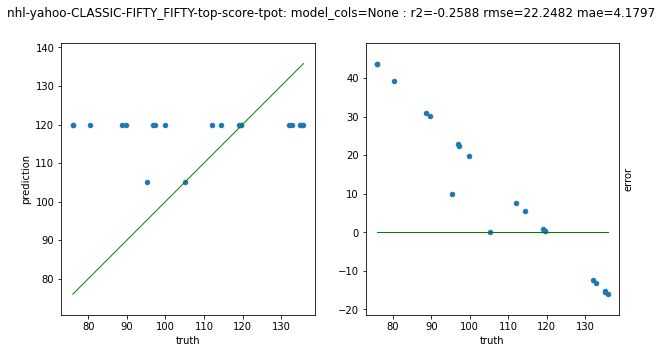

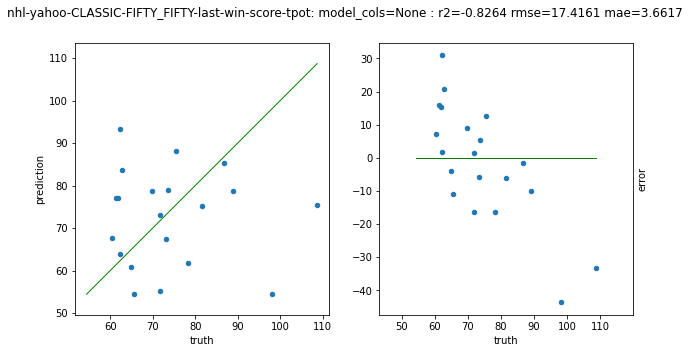

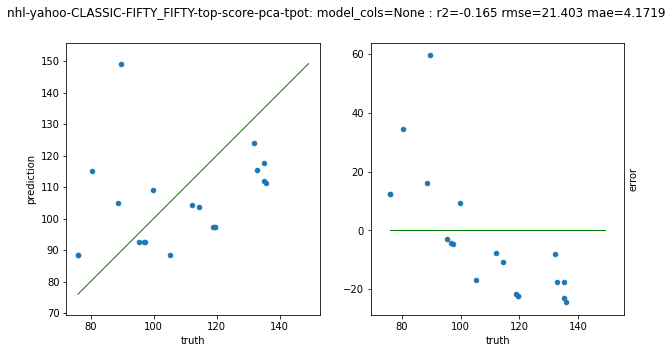

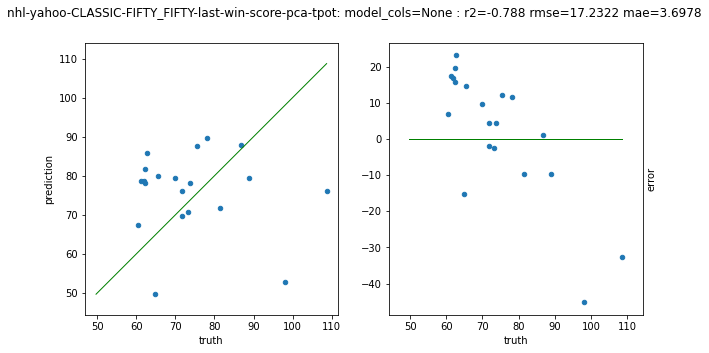

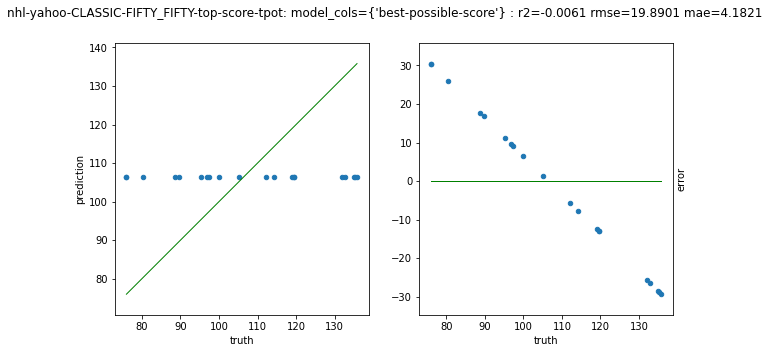

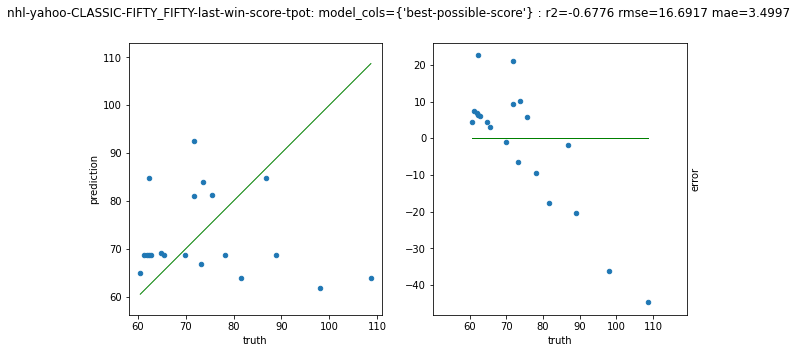

In [3]:
from fantasy_py import ContestStyle
from fantasy_py.lineup.strategy import GeneralPrizePool, FiftyFifty

# normal test run
STYLE = ContestStyle.CLASSIC

SPORT = 'nhl'

RANDOM_SEED = 0

AUTOML_PARAMS = {
#     'skautoml': {
#         'per_run_time_limit': 120,
#         'sk_overwrite': True,
#         'max_train_time': 600,
#     },
    'tpot': {
        'population_size': 100, 
        'n_jobs': 4,
        'verbosity': 2,
        # 'train_time': 600,
        'generations': 100,
        'early_stop': 10,
    }
}

models = {}      
            
LOGGER.info("starting")

for framework, params in AUTOML_PARAMS.items(): 
    for service in ['yahoo']: # ['fanduel', 'draftkings', 'yahoo']:
        for contest_type in [FiftyFifty]: # [GeneralPrizePool, FiftyFifty]:
            new_models = evaluate_models(SPORT, service, STYLE, contest_type, framework, params, seed=RANDOM_SEED)
            if new_models is None:
                LOGGER.warning("No models generated for %s-%s-%s-%s", 
                               SPORT, service, STYLE.name, contest_type.NAME)
            else: 
                models.update(new_models)

LOGGER.info("done")